In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Definindo os parâmetros
num_items = 10  # Número de itens
max_weight = 50  # Peso máximo da mochila
population_size = 20  # Tamanho da população
num_generations = 100  # Número de gerações
mutation_rate = 0.2  # Aumentar a taxa de mutação para promover diversidade

# Itens: (peso, valor)
items = [(random.randint(5, 15), random.randint(10, 30)) for _ in range(num_items)]
print("Itens gerados (peso, valor):", items)

def create_population(size):
    return [np.random.randint(2, size=num_items).tolist() for _ in range(size)]  # Criando lista de listas

def fitness(solution):
    total_weight = np.sum(solution * [item[0] for item in items])
    total_value = np.sum(solution * [item[1] for item in items])
    if total_weight > max_weight:
        return 0  # Penaliza se exceder o peso
    return total_value

def tournament_selection(population):
    selected = []
    while len(selected) < len(population) // 2:
        competitors = random.sample(population, min(3, len(population)))  # Seleciona 3 competidores aleatórios
        winner = max(competitors, key=fitness)  # Seleciona o melhor
        if fitness(winner) > 0:  # Adiciona apenas se a aptidão for maior que 0
            selected.append(winner)
    # Garantir que sempre haja um número mínimo de selecionados
    while len(selected) < len(population) // 2:
        selected.append(random.choice(population))
    return selected

def crossover(parent1, parent2):
    point = random.randint(1, num_items - 1)
    child = parent1[:point] + parent2[point:]

    # Verifique se o filho excede o peso máximo
    while np.sum(np.array(child) * np.array([item[0] for item in items])) > max_weight:
        child = parent1[:point] + np.random.randint(2, size=num_items).tolist()
    
    return child

def mutate(solution):
    for idx in range(len(solution)):
        if random.random() < mutation_rate:
            solution[idx] = 1 - solution[idx]  # Inverte o bit
            
            # Verifique se a solução ainda é válida após a mutação
            if np.sum(np.array(solution) * np.array([item[0] for item in items])) > max_weight:
                solution[idx] = 1 - solution[idx]  # Reverte a mutação se exceder o peso
    return solution

# Loop principal do algoritmo genético
population = create_population(population_size)
fitness_history = []  # Lista para armazenar a evolução da aptidão

for generation in range(num_generations):
    selected = tournament_selection(population)  # Não precisa converter para lista
    next_generation = []

    for i in range(len(selected) // 2):
        parent1 = selected[i]
        parent2 = selected[len(selected) - i - 1]
        child = crossover(parent1, parent2)
        child = mutate(child)
        next_generation.append(child)

    # Se a próxima geração estiver vazia, preencha com indivíduos da população anterior
    if not next_generation:
        print("População vazia na geração.")
        break
    
    population = next_generation  # Atualiza a população

    # Imprimir a população atual
    print(f"Geração {generation + 1}: População:\n", population)

    # Verifique se a população não está vazia antes de calcular a aptidão
    if population:
        best_fitness = max(fitness(ind) for ind in population)
        fitness_history.append(best_fitness)  # Armazena a melhor aptidão da geração
        print(f"Melhor aptidão na geração {generation + 1}: {best_fitness}")  # Impressão da melhor aptidão
    else:
        print("População vazia na geração.")
        break

# Melhor solução
if population:
    best_solution = max(population, key=fitness)
    best_value = fitness(best_solution)
    best_weight = np.sum(np.array(best_solution) * np.array([item[0] for item in items]))

    # Itens incluídos na melhor solução
    included_items = [(i, items[i]) for i in range(num_items) if best_solution[i] == 1]

    # Exibindo resultados
    print("Melhor solução:", best_solution)
    print("Valor total:", best_value)
    print("Peso total:", best_weight)
    print("Itens incluídos:", included_items)

    # Gráfico da evolução da aptidão
    plt.plot(range(len(fitness_history)), fitness_history, marker='o')
    plt.title('Evolução da Aptidão ao Longo das Gerações')
    plt.xlabel('Gerações')
    plt.ylabel('Aptidão')
    plt.grid()
    plt.show()
else:
    print("Não foi possível encontrar uma solução viável.")

Itens gerados (peso, valor): [(13, 29), (13, 13), (6, 10), (12, 30), (6, 28), (13, 27), (8, 20), (15, 14), (6, 18), (5, 18)]


TypeError: can't multiply sequence by non-int of type 'list'

Itens gerados (peso, valor): [(6, 23), (10, 14), (14, 20), (14, 14), (7, 20), (10, 18), (12, 21), (5, 23), (12, 24), (10, 11)]
Geração 1: População:
 [[1, 0, 1, 0, 1, 0, 0, 0, 1, 0], [1, 0, 0, 1, 1, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0, 1, 1, 0], [0, 0, 0, 1, 0, 0, 1, 0, 0, 1], [1, 0, 1, 0, 1, 0, 0, 0, 1, 0]]
Melhor aptidão na geração 1: 87
Geração 2: População:
 [[1, 1, 1, 0, 1, 0, 0, 0, 1, 0]]
Melhor aptidão na geração 2: 101
População vazia na geração.
Melhor solução: [1, 1, 1, 0, 1, 0, 0, 0, 1, 0]
Valor total: 101
Peso total: 49
Itens incluídos: [(0, (6, 23)), (1, (10, 14)), (2, (14, 20)), (4, (7, 20)), (8, (12, 24))]


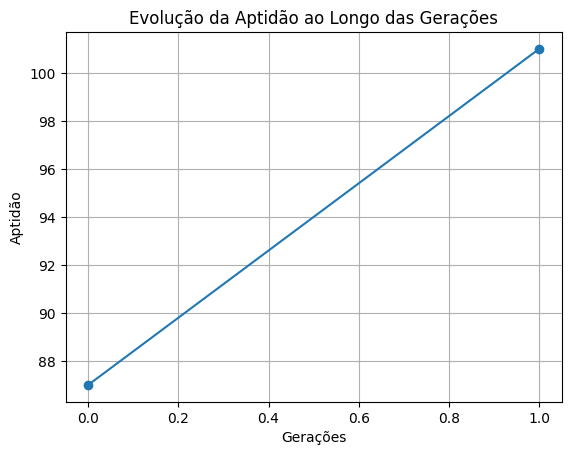

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Definindo os parâmetros
num_items = 10  # Número de itens
max_weight = 50  # Peso máximo da mochila
population_size = 20  # Tamanho da população
num_generations = 100  # Número de gerações
mutation_rate = 0.2  # Taxa de mutação

# Itens: (peso, valor)
items = [(random.randint(5, 15), random.randint(10, 30)) for _ in range(num_items)]
print("Itens gerados (peso, valor):", items)

def create_population(size):
    return [np.random.randint(2, size=num_items).tolist() for _ in range(size)]  # Criando lista de listas

def fitness(solution):
    total_weight = np.sum(np.array(solution) * np.array([item[0] for item in items]))
    total_value = np.sum(np.array(solution) * np.array([item[1] for item in items]))
    if total_weight > max_weight:
        return 0  # Penaliza se exceder o peso
    return total_value

def tournament_selection(population):
    selected = []
    while len(selected) < len(population) // 2:
        competitors = random.sample(population, min(3, len(population)))  # Seleciona 3 competidores aleatórios
        winner = max(competitors, key=fitness)  # Seleciona o melhor
        if fitness(winner) > 0:  # Adiciona apenas se a aptidão for maior que 0
            selected.append(winner)
    # Garantir que sempre haja um número mínimo de selecionados
    while len(selected) < len(population) // 2:
        selected.append(random.choice(population))
    return selected

def crossover(parent1, parent2):
    point = random.randint(1, num_items - 1)
    child = parent1[:point] + parent2[point:]

    # Verifique se o filho excede o peso máximo
    while np.sum(np.array(child) * np.array([item[0] for item in items])) > max_weight:
        child = parent1[:point] + np.random.randint(2, size=num_items).tolist()
    
    return child

def mutate(solution):
    for idx in range(len(solution)):
        if random.random() < mutation_rate:
            solution[idx] = 1 - solution[idx]  # Inverte o bit
            
            # Verifique se a solução ainda é válida após a mutação
            if np.sum(np.array(solution) * np.array([item[0] for item in items])) > max_weight:
                solution[idx] = 1 - solution[idx]  # Reverte a mutação se exceder o peso
    return solution

# Loop principal do algoritmo genético
population = create_population(population_size)
fitness_history = []  # Lista para armazenar a evolução da aptidão

for generation in range(num_generations):
    selected = tournament_selection(population)  # Não precisa converter para lista
    next_generation = []

    for i in range(len(selected) // 2):
        parent1 = selected[i]
        parent2 = selected[len(selected) - i - 1]
        child = crossover(parent1, parent2)
        child = mutate(child)
        next_generation.append(child)

    # Se a próxima geração estiver vazia, preencha com indivíduos da população anterior
    if not next_generation:
        print("População vazia na geração.")
        break
    
    population = next_generation  # Atualiza a população

    # Imprimir a população atual
    print(f"Geração {generation + 1}: População:\n", population)

    # Verifique se a população não está vazia antes de calcular a aptidão
    if population:
        best_fitness = max(fitness(ind) for ind in population)
        fitness_history.append(best_fitness)  # Armazena a melhor aptidão da geração
        print(f"Melhor aptidão na geração {generation + 1}: {best_fitness}")  # Impressão da melhor aptidão
    else:
        print("População vazia na geração.")
        break

# Melhor solução
if population:
    best_solution = max(population, key=fitness)
    best_value = fitness(best_solution)
    best_weight = np.sum(np.array(best_solution) * np.array([item[0] for item in items]))

    # Itens incluídos na melhor solução
    included_items = [(i, items[i]) for i in range(num_items) if best_solution[i] == 1]

    # Exibindo resultados
    print("Melhor solução:", best_solution)
    print("Valor total:", best_value)
    print("Peso total:", best_weight)
    print("Itens incluídos:", included_items)

    # Gráfico da evolução da aptidão
    plt.plot(range(len(fitness_history)), fitness_history, marker='o')
    plt.title('Evolução da Aptidão ao Longo das Gerações')
    plt.xlabel('Gerações')
    plt.ylabel('Aptidão')
    plt.grid()
    plt.show()
else:
    print("Não foi possível encontrar uma solução viável.")